In [ ]:
!pip install arviz
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

import io

In [ ]:
import arviz as az

### GROUP MEMBERS

K16-3795 (M.Hammad Mobin)

K16-3788 (Krinza Momin)

K16-3778 (Bilal Khan)

K16-3759 (Haris Mughal)

K16-4018 (Waseem Ullah)

# MEDICAL INSURANCE

###Datasets Source

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. https://www.kaggle.com/mirichoi0218/insurance

### 1) Problem Statement

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium. Can you accurately predict insurance costs?

### Import Data

Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

In [ ]:

df = pd.read_csv('big_ins.csv')
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,9.734176
1,1,18,1,33.770,1,0,2,7.453302
2,2,28,1,33.000,3,0,2,8.400538
3,3,33,1,22.705,0,0,1,9.998092
4,4,32,1,28.880,0,0,1,8.260197


In [ ]:
df.shape

(1338, 8)

There are 1338 observations and 8 columns for insurance dataset.

In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [ ]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

There are no Null Values in the insurance dataset

In [ ]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['Unnamed: 0', 'sex', 'smoker', 'region', 'charges']


## A) Exploratory Data Analysis (EDA)

Now previously we do EDA in detail now we do analysis for our predictions only which can help us.

### i) BMI (Body Mass Index) and Charges






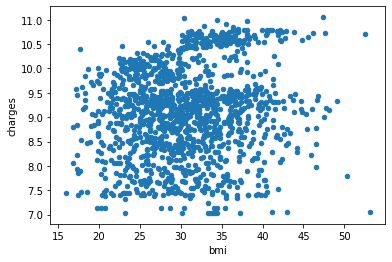

In [ ]:
df.plot.scatter(x='bmi', y='charges', s=20);

Here we can concluded that we cannot find any useful relations between bmi and charges which can help us to build the estimates for insurance charges.

### ii) AGE and Charges

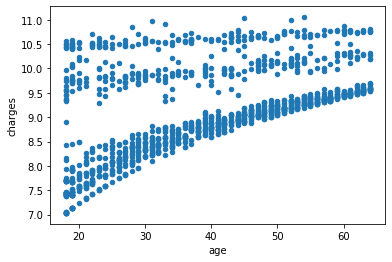

In [ ]:
df.plot.scatter(x='age', y='charges', s=20);

So here we find some relationship which show some quadratic line.Now if we delete some values then we get may be value without outlier.

In [ ]:
fit = df.copy()
fit.drop( fit[ fit['charges'] >= 9.5].index , inplace=True)

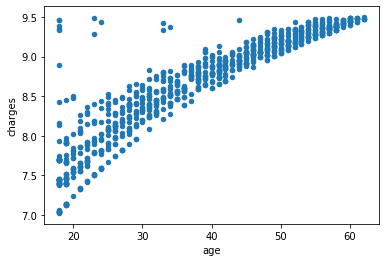

In [ ]:
fit.plot.scatter(x='age', y='charges', s=20);

So here we got what we need but wait let explore our data more.

In [ ]:
fit.groupby("smoker").charges.agg(["mean","median","count"])

,mean,median,count
smoker,,,
0,8.620369,8.763732,918
1,9.459499,9.459499,1


Now see here we got problem we get only one value of smoker from 274 smokers which is not good enough so move toward we divide the datasets into two parts smoker one and non-smoker one for prediction charges.

# SMOKERS MEDICAL INSURANCE

In [ ]:
smoker = df[df["smoker"] == 1]

## A) Exploratory Data Analysis (EDA)

### i) BMI (Body Mass Index) and Charges






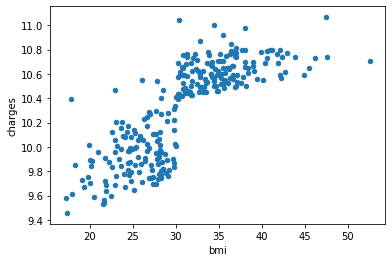

In [ ]:
smoker.plot.scatter(x='bmi', y='charges', s=20);

So finally we get some linear or quadratic relation which i think would be helpfull.

### ii) AGE and Charges



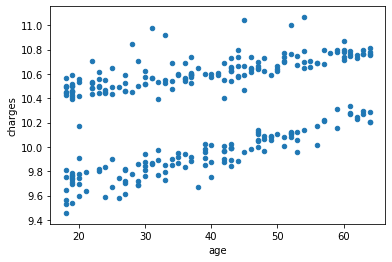

In [ ]:
smoker.plot.scatter(x='age', y='charges', s=20);

We will not get something useful for this so we ignore this and we will not move further because there are only three vaiable which are continous age,bmi and charges.so we build our model from bmi and charges one

## B) Linear Model

In [ ]:
x, y = smoker[['bmi', 'charges']].values.T


In [ ]:
with pm.Model() as linear_medical_model:
    
    β = pm.Normal('β', mu=0, sigma=50, shape=2)
    σ = pm.HalfNormal('σ', sigma=50)
    
    μ = β[0] + β[1] * x
    
    charges = pm.Normal('charges', mu=μ, sigma=σ, observed=y)

In [ ]:
with linear_medical_model:
    
    linear_trace = pm.sample(1000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:13<00:00, 453.78draws/s]


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

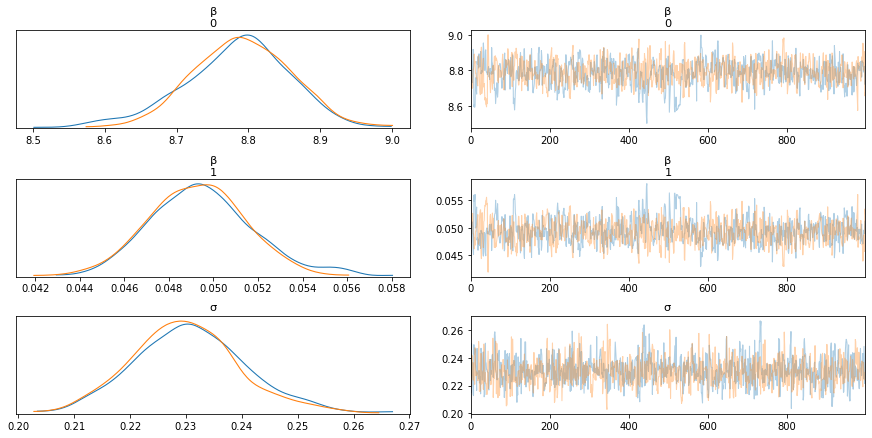

In [ ]:
az.plot_trace(linear_trace);

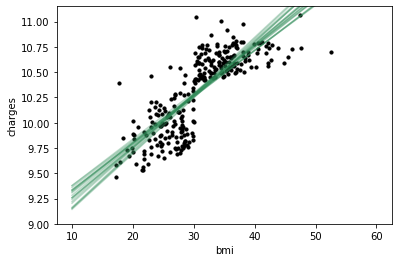

In [ ]:
X_pred = np.linspace(10, 60, 274)

ax = smoker.plot.scatter(x='bmi', y='charges', c='k', s=10)
ax.set_ylim(9, None)
for b0,b1 in linear_trace['β'][:20]:
    ax.plot(X_pred, b0 + b1*X_pred, alpha=0.3, color='seagreen');

In [ ]:
for b0,b1 in linear_trace['β'][:20]:
   y_pred= b0 + b1*X_pred
from sklearn import metrics
print('RMS= ', np.sqrt(metrics.mean_squared_error(y,y_pred)))

RMS=  0.7943126791304025


## B) Quadratic Model

In [ ]:
with pm.Model() as quad_medical_model:
    
    β = pm.Normal('β', mu=0, sigma=50, shape=3)
    σ = pm.HalfNormal('σ', sigma=50)
    
    μ = β[0] + β[1] * x + β[2] * x**2
    
    recruits = pm.Normal('charges', mu=μ, sigma=σ, observed=y)

In [ ]:
with quad_medical_model:
    
    quad_trace = pm.sample(1000, tune=2000, cores=2, random_seed=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:58<00:00, 102.34draws/s]


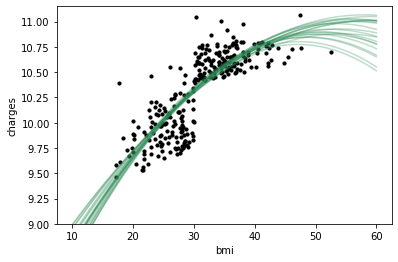

In [ ]:
ax = smoker.plot.scatter(x='bmi', y='charges', c='k', s=10)
ax.set_ylim(9, None)
for b0,b1,b2 in quad_trace['β'][:20]:
    ax.plot(X_pred, b0 + b1*X_pred + b2*X_pred**2, alpha=0.3, color='seagreen');

In [ ]:
for b0,b1 in linear_trace['β'][:20]:
   y_pred= b0 + b1*X_pred + b2*X_pred**2
from sklearn import metrics
print('RMS= ', np.sqrt(metrics.mean_squared_error(y,y_pred)))

RMS=  1.7858491992320307


# NON SMOKERS MEDICAL INSURANCE

In [ ]:

non_smoker = df[df["smoker"] == 0]


non_smoker.drop( non_smoker[ non_smoker['charges'] >= 9.5].index , inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## A) Exploratory Data Analysis (EDA)

### i) BMI (Body Mass Index) and Charges






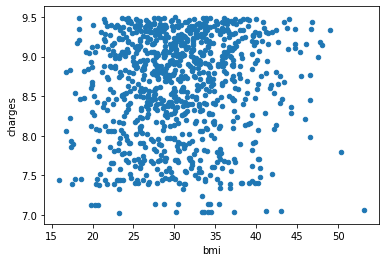

In [ ]:
non_smoker.plot.scatter(x='bmi', y='charges', s=20);

We will not get something useful for this so we ignore this.

### ii) AGE and Charges



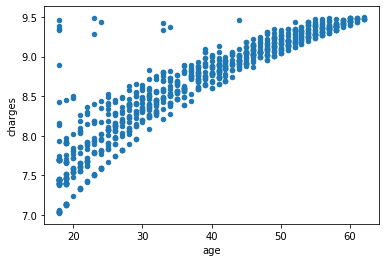

In [ ]:
non_smoker.plot.scatter(x='age', y='charges', s=20);

Text(0, 0.5, 'count')

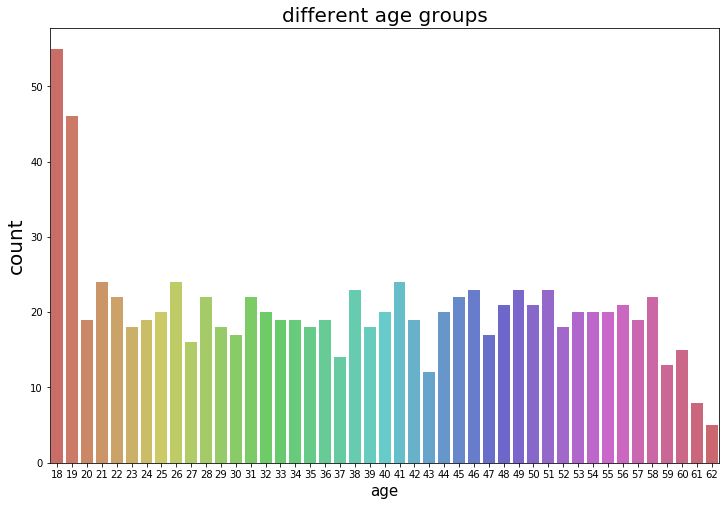

In [ ]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=non_smoker,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

In [ ]:
non_smoker.groupby("region").charges.agg(["mean","median","count"])

,mean,median,count
region,,,
0,8.704405,8.843837,214
1,8.645232,8.761153,230
2,8.506439,8.644883,234
3,8.632693,8.792692,240


In [ ]:
non_smoker.groupby("sex").charges.agg(["mean","median","count"])

,mean,median,count
sex,,,
0,8.672678,8.787487,463
1,8.567141,8.746677,455


In [ ]:
non_smoker.groupby("children").charges.agg(["mean","median","count"])

,mean,median,count
children,,,
0,8.415378,8.391333,396
1,8.682370,8.779336,236
2,8.806255,8.872614,157
3,8.893696,8.893093,97
4,9.007091,9.128787,16
5,8.911620,8.941028,16


So by Drop some values we will not see any difference so now our model is useful for models.

## B) Linear Model

In [ ]:
x, y = non_smoker[['age', 'charges']].values.T
non_smoker.shape

(918, 8)

In [ ]:
with pm.Model() as linear_medical_model:
    
    β = pm.Normal('β', mu=0, sigma=50, shape=2)
    σ = pm.HalfNormal('σ', sigma=50)
    
    μ = β[0] + β[1] * x
    
    charges = pm.Normal('charges', mu=μ, sigma=σ, observed=y)

In [ ]:
with linear_medical_model:
    
    linear_trace = pm.sample(1000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:10<00:00, 560.37draws/s]


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


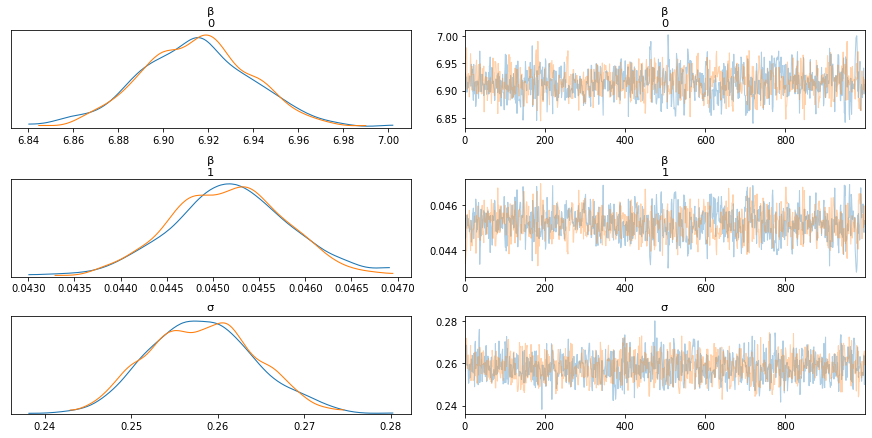

In [ ]:
az.plot_trace(linear_trace);

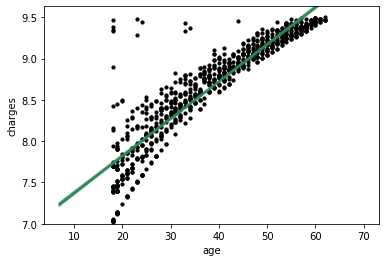

In [ ]:
X_pred = np.linspace(7, 70, 918)

ax = non_smoker.plot.scatter(x='age', y='charges', c='k', s=10)
ax.set_ylim(7, None)
for b0,b1 in linear_trace['β'][:20]:
    ax.plot(X_pred, b0 + b1*X_pred, alpha=0.3, color='seagreen');

In [ ]:
for b0,b1 in linear_trace['β'][:20]:
   y_pred= b0 + b1*X_pred
from sklearn import metrics
print('RMS= ', np.sqrt(metrics.mean_squared_error(y,y_pred)))

RMS=  1.0394556926201814


### Quadratic Model

In [ ]:
with pm.Model() as quad_medical_model:
    
    β = pm.Normal('β', mu=0, sigma=50, shape=3)
    σ = pm.HalfNormal('σ', sigma=50)
    
    μ = β[0] + β[1] * x + β[2] * x**2
    
    recruits = pm.Normal('charges', mu=μ, sigma=σ, observed=y)

In [ ]:
with quad_medical_model:
    
    quad_trace = pm.sample(1000, tune=2000, cores=2, random_seed=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:42<00:00, 134.70draws/s]
The number of effective samples is smaller than 25% for some parameters.


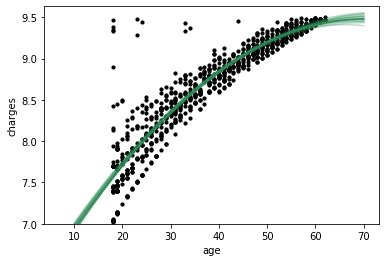

In [ ]:
ax = non_smoker.plot.scatter(x='age', y='charges', c='k', s=10)
ax.set_ylim(7, None)
for b0,b1,b2 in quad_trace['β'][:20]:
    ax.plot(X_pred, b0 + b1*X_pred + b2*X_pred**2, alpha=0.3, color='seagreen');

In [ ]:
for b0,b1 in linear_trace['β'][:20]:
   y_pred= b0 + b1*X_pred + b2*X_pred**2
from sklearn import metrics
print('RMS= ', np.sqrt(metrics.mean_squared_error(y,y_pred)))

RMS=  1.3983194760737763


SMOKERS

RMS (Linear) =  0.7943126791304025
 
RMS (Quadratic) =  1.7858491992320307



NON-SMOKERS

RMS (Linear) =   1.0394556926201814
 
RMS (Quadratic) =  1.3983194760737763